### 5th Homework - SVM Classification with the Breast Cancer Wisconsin Dataset
The goal of this exercise is to use Support Vector Machines (SVM) to classify data from the Breast Cancer Wisconsin dataset. 
1. Read the dataset from sklearn.datasets and perform a train test split. (1 point)
2. Create a pipeline from a `StandardScaler` and an `SVC` with linear kernel and fit the model. (1 point)
3. Plot the coefficients of the classifier as a horizontal bar plot, the features with larger weight are more important for the classification. What are the two most important features? (2 points)
4. To visualize the previous statement create a linear SVM classifier based on first the two most important and then the two less important features. Apply the two classifier to the test data and plot the decision boundaries. Calculate the accuracy of the two models. (3 points)
5. Show that if you know the most important features even a simple model is enought to predict up to high  
precision. Create a plot for different models including more and more features and show that the accuracy do not increase significantly with the added features. (2 points)


Dataset shape: (569, 30), Features: 30
Pipeline accuracy: 0.9561


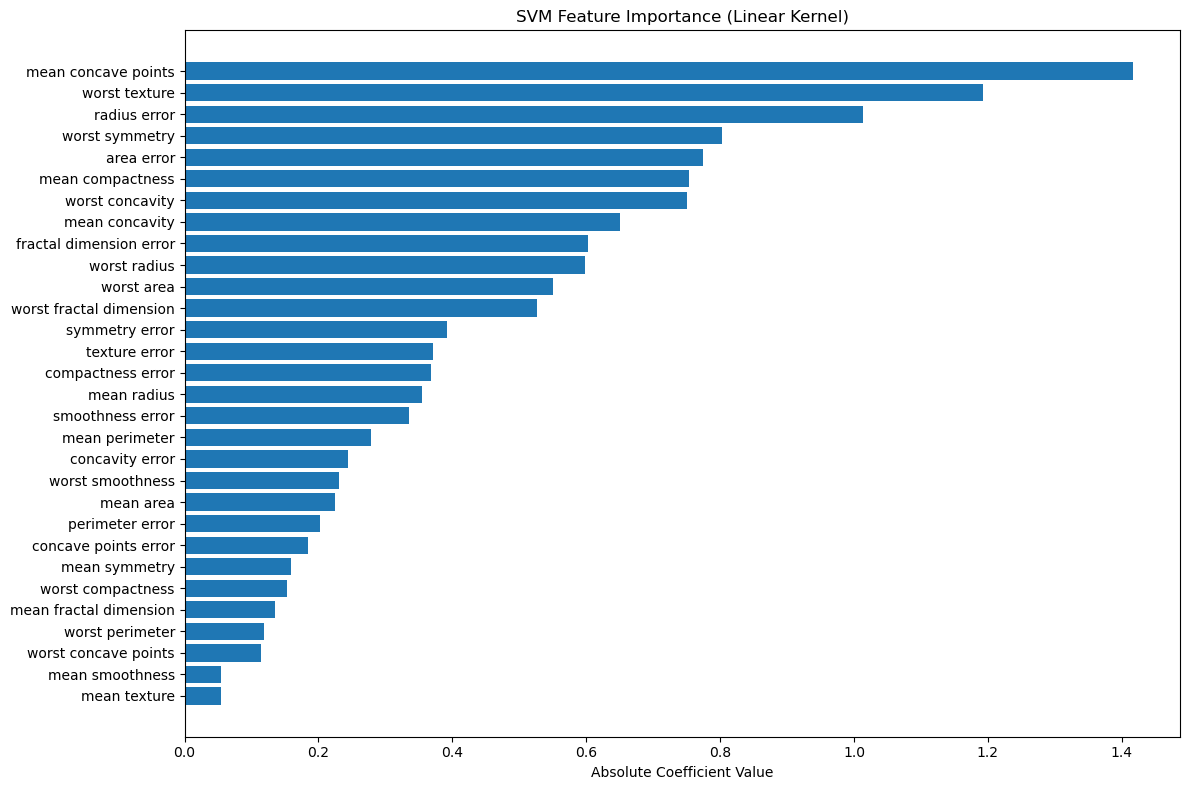

Two most important features: mean concave points, worst texture
Two least important features: mean smoothness, mean texture
Accuracy with most important features: 0.9386
Accuracy with least important features: 0.7544


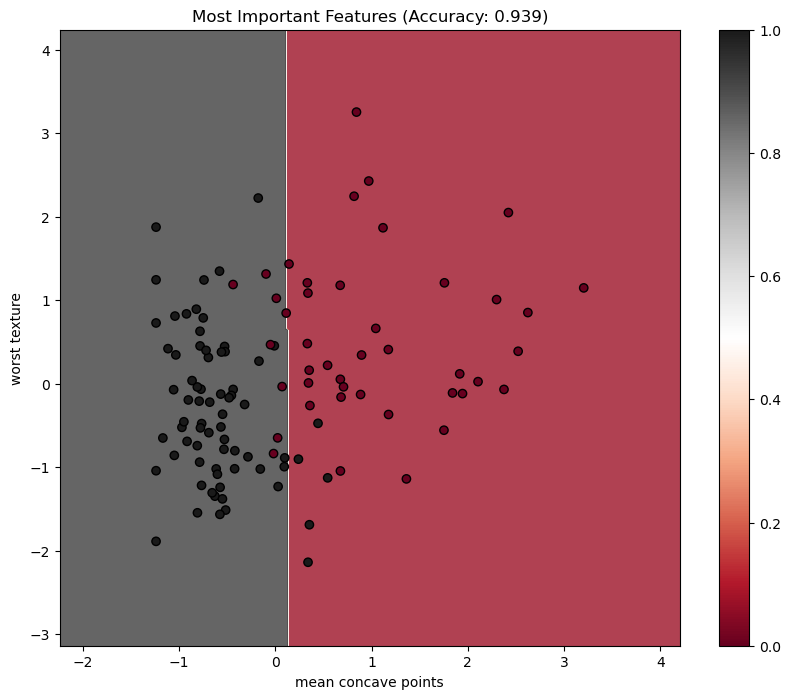

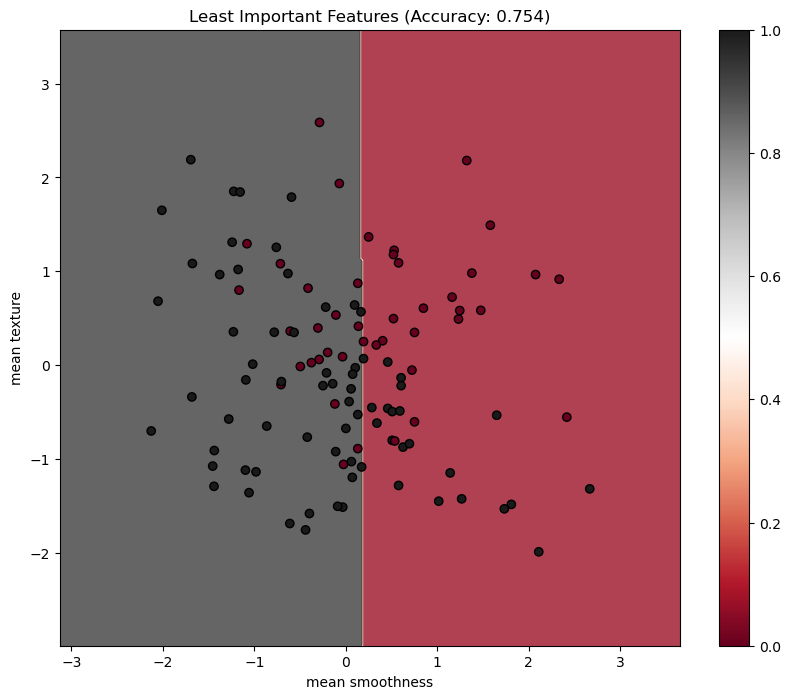

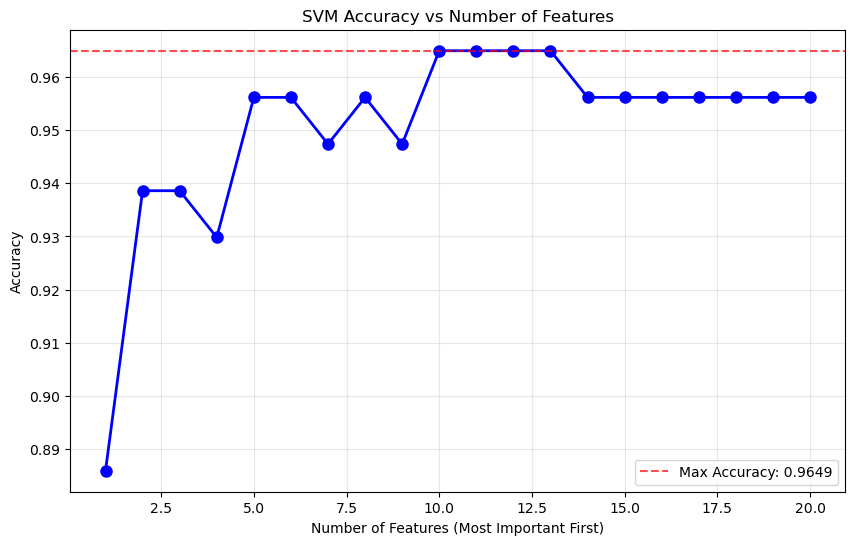

Accuracy with just 1 feature: 0.8860
Accuracy with 2 features: 0.9386
Max accuracy achieved: 0.9649 with 10 features
Accuracy improvement from 2 to 20 features: 0.0263
- Most important features provide 93.9% accuracy with just 2 features


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# 1. Load dataset and train-test split
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Dataset shape: {X.shape}, Features: {len(data.feature_names)}")

# 2. Create pipeline with StandardScaler and SVC
pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"Pipeline accuracy: {accuracy_score(y_test, y_pred):.4f}")

# 3. Plot coefficients to find most important features
svm_model = pipeline.named_steps['svc']
coefficients = svm_model.coef_[0]
feature_names = data.feature_names

# Sort features by absolute coefficient values
feature_importance = list(zip(feature_names, np.abs(coefficients)))
feature_importance.sort(key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12, 8))
features, importances = zip(*feature_importance)
plt.barh(range(len(features)), importances)
plt.yticks(range(len(features)), features)
plt.xlabel('Absolute Coefficient Value')
plt.title('SVM Feature Importance (Linear Kernel)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"Two most important features: {features[0]}, {features[1]}")
print(f"Two least important features: {features[-2]}, {features[-1]}")

# 4. Create SVM with most and least important features
most_important_idx = [list(feature_names).index(features[0]), list(feature_names).index(features[1])]
least_important_idx = [list(feature_names).index(features[-2]), list(feature_names).index(features[-1])]

# Most important features model
X_train_most = X_train[:, most_important_idx]
X_test_most = X_test[:, most_important_idx]
svm_most = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
svm_most.fit(X_train_most, y_train)
y_pred_most = svm_most.predict(X_test_most)
acc_most = accuracy_score(y_test, y_pred_most)

# Least important features model
X_train_least = X_train[:, least_important_idx]
X_test_least = X_test[:, least_important_idx]
svm_least = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
svm_least.fit(X_train_least, y_train)
y_pred_least = svm_least.predict(X_test_least)
acc_least = accuracy_score(y_test, y_pred_least)

print(f"Accuracy with most important features: {acc_most:.4f}")
print(f"Accuracy with least important features: {acc_least:.4f}")

# Plot decision boundaries
def plot_decision_boundary(X, y, model, title, feature_names):
    plt.figure(figsize=(10, 8))
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdGy)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdGy, edgecolors='black')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.colorbar(scatter)
    plt.show()

# Scale the data for plotting
scaler_most = StandardScaler()
X_test_most_scaled = scaler_most.fit_transform(X_test_most)
scaler_least = StandardScaler()
X_test_least_scaled = scaler_least.fit_transform(X_test_least)

plot_decision_boundary(X_test_most_scaled, y_test, svm_most, 
                      f'Most Important Features (Accuracy: {acc_most:.3f})',
                      [features[0], features[1]])

plot_decision_boundary(X_test_least_scaled, y_test, svm_least,
                      f'Least Important Features (Accuracy: {acc_least:.3f})',
                      [features[-2], features[-1]])

# 5. Progressive feature addition analysis
accuracies = []
n_features_list = range(1, min(21, len(feature_names) + 1))

for n_features in n_features_list:
    # Use top n most important features
    top_features_idx = [list(feature_names).index(features[i]) for i in range(n_features)]
    X_train_subset = X_train[:, top_features_idx]
    X_test_subset = X_test[:, top_features_idx]
    
    model = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
    model.fit(X_train_subset, y_train)
    y_pred_subset = model.predict(X_test_subset)
    acc = accuracy_score(y_test, y_pred_subset)
    accuracies.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(n_features_list, accuracies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Features (Most Important First)')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs Number of Features')
plt.grid(True, alpha=0.3)
plt.axhline(y=max(accuracies), color='r', linestyle='--', alpha=0.7, label=f'Max Accuracy: {max(accuracies):.4f}')
plt.legend()
plt.show()

print(f"Accuracy with just 1 feature: {accuracies[0]:.4f}")
print(f"Accuracy with 2 features: {accuracies[1]:.4f}")
print(f"Max accuracy achieved: {max(accuracies):.4f} with {n_features_list[accuracies.index(max(accuracies))]} features")
print(f"Accuracy improvement from 2 to {len(n_features_list)} features: {max(accuracies) - accuracies[1]:.4f}")

print(f"- Most important features provide {accuracies[1]:.1%} accuracy with just 2 features")

